In [110]:
%matplotlib inline
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import *
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G
print(sympy.__version__)
init_printing(use_unicode=True)
x, g, X = symbols('x g X', cls = Function)

1.11.1


## Check that get desired properties for basic ftns

In [111]:
laplace_transform(Heaviside(t,0), t, s, noconds = True) # Checking the performance of the Laplace Transform Module

In [114]:
g = DiracDelta(t)
laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 1.

## Define the LP of the second order diff eq

In [135]:
# define the differential equation to solve
if (1):
    x0 = 1
    v0 = 2
    # input is a delta
    a = 2
    b = 7
    c = 3
    d = 1
    W = laplace_transform(d * g, t, s, noconds = True)
    x0p = x0 
    v0p = v0 + d/a
elif(1):
    x0 = 2
    v0 = 4
    # input is a delta
    a = 1
    b = 5
    c = 6
    d = 4
    W = laplace_transform(d * g, t, s, noconds = True)
    x0p = x0 
    v0p = v0 + d/a
else:
    # input is a step
    eom  = Eq(1*(s**2 *X(s)- s*x0 - v0) + 5*(s*X(s) - x0)+ 6 * X(s), laplace_transform(Heaviside(t,0), t, s, noconds = True))

eom  = Eq(a*(s**2 *X(s)- s*x0 - v0) + b*(s*X(s) - x0) + c * X(s), W)
eom.replace(Heaviside(0), 0)

## Solve for the laplace transformed value that must be inverse transformed

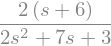

In [136]:
Xofs = solve(eom,X(s))
Xofs = Xofs[0].replace(Heaviside(0), 0)
Xofs

In [137]:
soln = inverse_laplace_transform(Xofs,s,t)

In [138]:
# compute soln at time 0 to confirm that x(0) = x0
soln_x0 = soln.replace(Heaviside(0), 1).replace(DiracDelta(0), 0).subs(t,0)
print(f'Initial condition x(0) was '+str(x0p)+' and is '+str(soln_x0))

Initial condition x(0) was 1 and is 1


In [140]:
# compute soln at time 0 to confirm that x(0) = x0
soln_v0 = expand(soln).replace(Heaviside(t), 1).diff(t).subs(t,0)
print(f'Initial condition v(0) was '+str(v0p)+' and is '+str(float(soln_v0)))

Initial condition v(0) was 2.5 and is 2.5


In [18]:
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import *
import sympy as sympy
import numpy as np
from sympy.abc import a, t, x, s, X, g, G
init_printing(use_unicode=True)

x, g, X = symbols('x g X', cls = Function)
x0 = 4
v0 = 7
g = Heaviside(t) #This is just the step function
eom  = Eq(3*(s**2 * X(s)-s*x0-v0)+30 * (s*X(s)-x0)+ 63 * X(s), 0)
eom
Xofs = solve(eom,X(s))
print(Xofs[0])
soln = inverse_laplace_transform(Xofs[0],s,t)
print(soln)
soln_simp = expand(soln)
print(soln_simp)
ydot = soln_simp.diff(t)
y0 = soln.subs(t,0+np.finfo(float).eps)
print("%f" %y0)
ydot0 = ydot.subs(t,0+np.finfo(float).eps)
print("%f" %ydot0)

(4*s + 47)/(s**2 + 10*s + 21)
(35*exp(4*t) - 19)*exp(-7*t)*Heaviside(t)/4
35*exp(-3*t)*Heaviside(t)/4 - 19*exp(-7*t)*Heaviside(t)/4
4.000000
7.000000


In [19]:
from sympy.integrals.transforms import laplace_transform 
from sympy.integrals.transforms import inverse_laplace_transform 
from sympy import * 
import sympy as sympy 
import numpy as np 
from sympy.abc import a, t, x, s, X, g, G 
init_printing(use_unicode=True)

In [19]:
x, g, X = symbols('x g X', cls = Function) 
x0 = 5 
v0 = 0 
g = sympy.exp(-t)*Heaviside(t) 
g = 1*DiracDelta(t) 
g = Heaviside(t) 
g

In [20]:
G = laplace_transform( g, t, s, noconds = True)
G   

In [21]:
Gsimp = G.replace(Heaviside(0), 0)
Gsimp

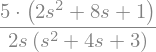

In [22]:
eom = Eq(2*(s**2 *X(s) -s*x0 - v0) + 8*(s*X(s)-x0) + 6*X(s), 5*Gsimp)

Xofs = solve(eom,X(s)) 
Xofs[0]


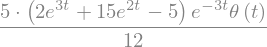

In [23]:
soln = inverse_laplace_transform(Xofs[0],s,t) 
soln

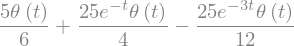

In [24]:
y_sol = expand(soln) 
y_sol

In [25]:
y0_pos = y_sol.subs(t,0+np.finfo(float).eps) 
print("y(0+) = %3.2f" %y0_pos)

y(0+) = 5.00


In [26]:
y0_neg = y_sol.subs(t,0-np.finfo(float).eps) 
print("y(0-) = %3.2f" %y0_neg)

y(0-) = 0.00


In [27]:
ydot = y_sol.diff(t) 
ydot0_pos = ydot.subs(t,0+np.finfo(float).eps) 
print("dy/dt(0+) = %3.2f" %ydot0_pos)

dy/dt(0+) = -0.00


In [28]:
ydot0_neg = ydot.subs(t,0-np.finfo(float).eps) 
print("dy/dt(0-) = %3.2f" %ydot0_neg)

dy/dt(0-) = 0.00


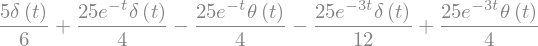

In [29]:
ydot

In [30]:
5/6-5/4-25/12

In [31]:
x = -sympy.exp(-t/2) + sympy.exp(-3*t)
x

In [32]:
xdot = x.diff(t)

In [33]:
xdot0_pos = xdot.subs(t,0+np.finfo(float).eps) 
xdot0_pos